# Kamera

In [37]:
import numpy as np
from pylab import *
import cv2
%matplotlib inline

# Grauwertkeiles
## Unser Bild

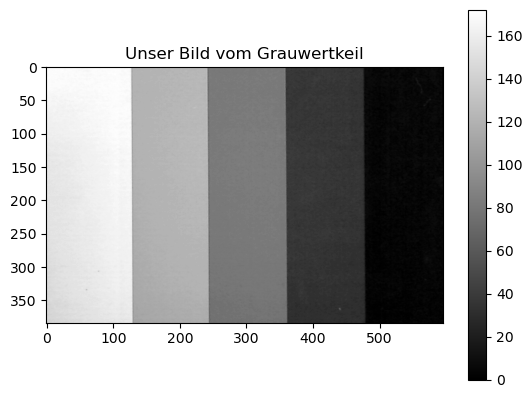

In [38]:
grauwertkeil_unser = cv2.imread("Kamera Messungen/grau1.png")
grauwertkeil_unser = cv2.cvtColor(grauwertkeil_unser, cv2.COLOR_RGB2GRAY)[10:460, 0:600]
figure()
imshow(grauwertkeil_unser, cmap="gray")
colorbar()
title('Unser Bild vom Grauwertkeil')
show()

## Original

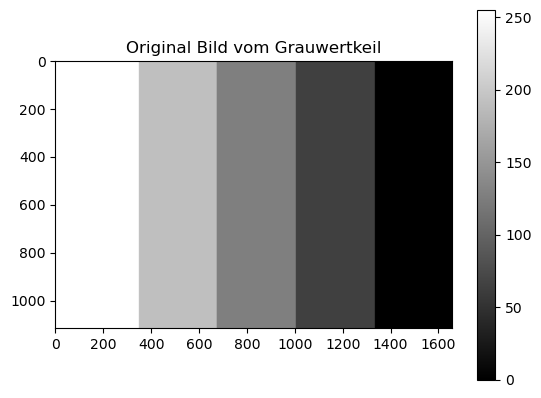

In [39]:
grauwertkeil_orignal = cv2.imread("Kamera Messungen/original_grau.png")
grauwertkeil_orignal = cv2.cvtColor(grauwertkeil_orignal, cv2.COLOR_RGB2GRAY)
figure()
imshow(grauwertkeil_orignal, cmap="gray")
colorbar()
title('Original Bild vom Grauwertkeil')
show()

# Aufteilen

[161.578125   120.00848958  81.79578125  35.34979167   3.73015625]
[5.04064114 2.73059075 1.87744644 2.22769966 1.91652544]


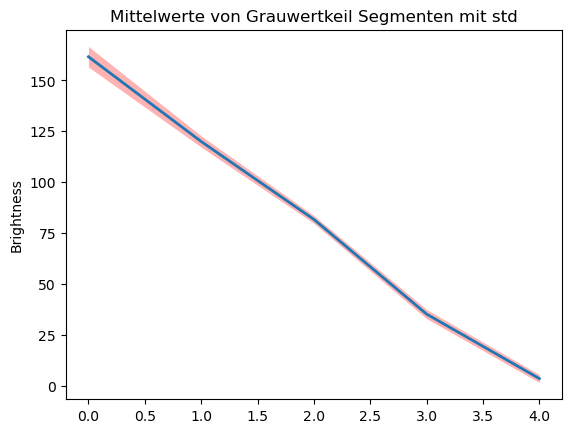

In [40]:
teil1 = grauwertkeil_unser[:, 50:100]
teil2 = grauwertkeil_unser[:, 150:200]
teil3 = grauwertkeil_unser[:, 280:330]
teil4 = grauwertkeil_unser[:, 400:450]
teil5 = grauwertkeil_unser[:, 500:550]
teile_unser_bild = np.array([teil1, teil2, teil3, teil4, teil5])
teile_unser_bild_mean = np.array([np.mean(teil1), np.mean(teil2), np.mean(teil3), np.mean(teil4), np.mean(teil5)])
teile_unser_bild_std = np.array([np.std(teil1), np.std(teil2), np.std(teil3), np.std(teil4), np.std(teil5)])
print(teile_unser_bild_mean)
print(teile_unser_bild_std)
figure()
x = range(0, 5)
plot(x, teile_unser_bild_mean, linewidth=2)
fill_between(x, teile_unser_bild_mean + teile_unser_bild_std, teile_unser_bild_mean - teile_unser_bild_std, alpha=0.3, color='r', linewidth=0)
title('Mittelwerte von Grauwertkeil Segmenten mit std')
ylabel('Brightness')
show()

# Dunkelbild

max=0.0


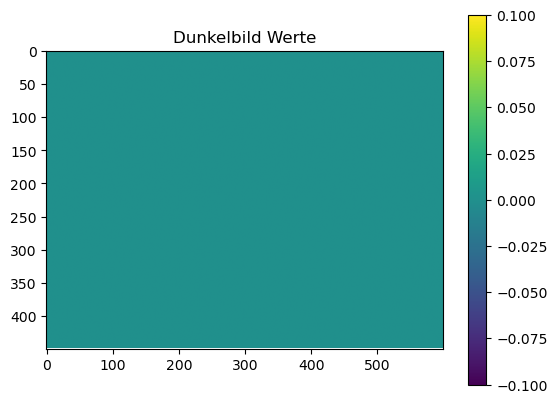

In [41]:
def read_black_image(img_num):
    black_img = cv2.imread("Kamera Messungen/test" + str(img_num) + ".png")
    black_img = cv2.cvtColor(black_img, cv2.COLOR_BGR2GRAY)
    return black_img[10:460, 0:600]

black_images = np.array([
    read_black_image(0),
    read_black_image(1),
    read_black_image(2),
    read_black_image(3),
    read_black_image(4),
    read_black_image(5),
    read_black_image(6),
    read_black_image(7),
    read_black_image(8),
    read_black_image(9),
], dtype=np.float64)

summed_black_image = np.sum(black_images, axis=0)
mean_black_image = summed_black_image / size(black_images)

print("max=" + str(np.max(mean_black_image)))
# mean_image = mean_image / np.max(mean_image)

figure()

imshow(mean_black_image)
colorbar()

title('Dunkelbild Werte')

show()

def sub_black_image(img):
    return img - mean_black_image

Unsere Bilder bestehen nur aus 0er. Also haben wir keinerlei fehler im Dunkelbild.

# Weißbilder

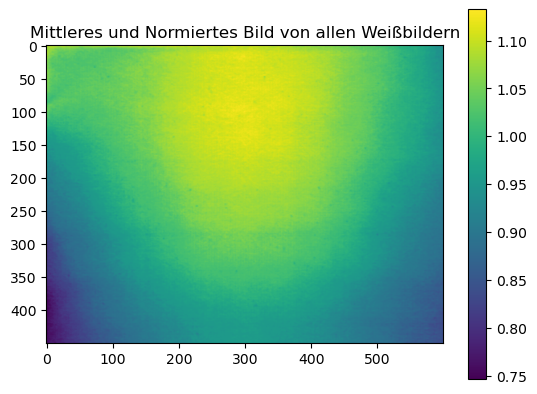

In [42]:
def read_white_image(img_num):
    white_img = cv2.imread("Kamera Messungen/testWeiss" + str(img_num) + ".png")
    white_img = cv2.cvtColor(white_img, cv2.COLOR_BGR2GRAY)
    return white_img[10:460, 0:600]

testImg = read_white_image(0)

white_images = np.array([
    read_white_image(0),
    read_white_image(1),
    read_white_image(2),
    read_white_image(3),
    read_white_image(4),
    read_white_image(5),
    read_white_image(6),
    read_white_image(7),
    read_white_image(8),
    read_white_image(9),
], dtype=np.float64)

summed_white_image = np.sum(white_images, axis=0)
mean_white_image = summed_white_image / size(white_images)

white_image = mean_white_image - mean_black_image
white_image = white_image / np.mean(white_image)

figure()
imshow(white_image)
colorbar()
title('Mittleres und Normiertes Bild von allen Weißbildern')
show()